Тестовое задание
================

## Pandas

Файл `task_history.csv` содержит исторические данные системы сборки (e.g. *jenkins*, *teamcity*, etc.)

Каждая запись в истории описывает отдельный запуск задачи `build_name` на рабочей машине `worker`.<br/>
Для любого запуска известны автор `author` и проект `project`, в рамках которого был запущен расчет данной задачи.

### Задача 1

Для каждой недели распечатайте топ-3 пользователей, потребивших наибольшее количество машиночасов.

Выведите для данных пользователей процент потребленных ресурсов от общего объема расчетов за эту неделю.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('task_history.csv')

In [3]:
# Преобразование столбцов start_time и finish_time в формат datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['finish_time'] = pd.to_datetime(df['finish_time'])

# Вычисление разницы между start_time и finish_time в часах
df['machine_hours'] = (df['finish_time'] - df['start_time']).dt.total_seconds() / 3600

# Получение номера недели в виде цифры
df['week'] = df['start_time'].dt.isocalendar().week

# Группировка данных по неделям и пользователям, суммирование машиночасов и сортировка
weekly_top_users = df.groupby(['week', 'author'])['machine_hours'].sum().reset_index()
weekly_top_users = weekly_top_users.sort_values(by=['week', 'machine_hours'], ascending=[True, False])

# Получение топ-3 пользователей для каждой недели
top_users_per_week = weekly_top_users.groupby('week').head(3).reset_index(drop=True)

print(top_users_per_week)

    week          author  machine_hours
0     25    Bendy Python    4138.810396
1     25  Marsha Koltron     427.651394
2     25     Java Smoozy     270.742420
3     26    Bendy Python    4813.973270
4     26  Marsha Koltron     756.827916
5     26     John Ivanov     532.381616
6     27    Bendy Python    4257.156759
7     27     Java Smoozy     515.101502
8     27      Eric Smith     346.350059
9     28    Bendy Python    4130.059397
10    28    Kenny Ivanov     378.333023
11    28    John Koltron     284.678291


### Задача 2

Отобразите график с ежедневным потреблением машинного времени каждым проектом.

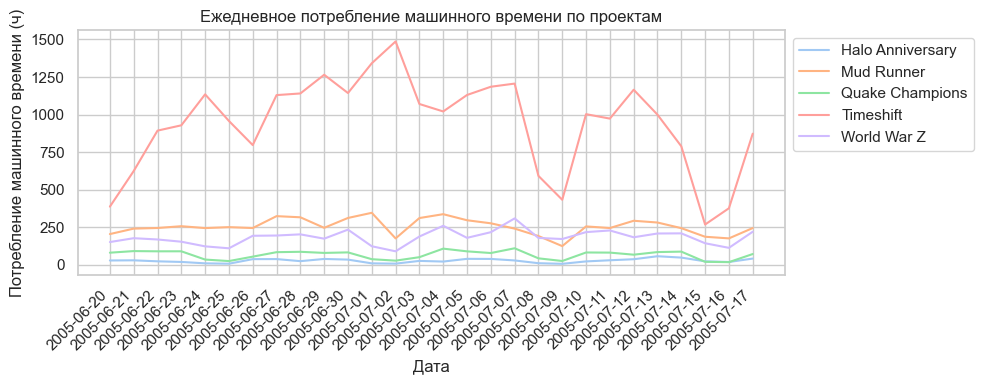

In [4]:
# Получение дней и проектов
df['date'] = df['start_time'].dt.date

# Группировка данных
df_day = df.groupby(['date', 'project'])['machine_hours'].sum().reset_index()

# Построение графика с использованием seaborn
plt.figure(figsize=(10, 4))
sns.set_theme(style="whitegrid", palette="pastel")

sns.lineplot(x='date', y='machine_hours', hue='project', data=df_day)
plt.title('Ежедневное потребление машинного времени по проектам')
plt.xlabel('Дата')
plt.ylabel('Потребление машинного времени (ч)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.xticks(ticks=df_day['date'].unique(), labels=[str(date) for date in df_day['date'].unique()], rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Задача 3

Рассмотрим *еженедельное* общее потребление ресурсов. На второй неделе можно заметить всплеск нагрузки с ее последующим планомерным снижением.

Проанализируйте предоставленные данные и найдите, с чем связано подобное поведение.

In [6]:
# Группировка данных по неделям и суммирование машиночасов
df_week = df.groupby(['week', 'status'])['machine_hours'].sum().reset_index()
print(df_week)

    week   status  machine_hours
0     25   cancel     245.725652
1     25     fail    1009.801884
2     25  success    7818.564968
3     26   cancel    1173.321225
4     26     fail    3033.333156
5     26  success    8205.799297
6     27   cancel     592.219206
7     27     fail    1601.456445
8     27  success    8304.410032
9     28   cancel     301.409101
10    28     fail     525.104848
11    28  success    8246.713419


In [7]:
# Группировка данных по 25 неделе со статусами и проектами
df_week_25 = df.groupby(['week', 'status','project'])['machine_hours'].sum().reset_index()
pivot_table = df_week_25.pivot(index=['status', 'project'], columns='week', values='machine_hours')
pivot_table

week                               25           26           27           28
status  project                                                             
cancel  Halo Anniversary     4.058197     2.309927     0.700311     5.357559
        Mud Runner          38.979329    49.548452    61.778517    23.496589
        Quake Champions      6.871591    10.452502     5.145756     3.899653
        Timeshift          182.086695  1106.970642   426.761572   254.964309
        World War Z         13.729840     4.039703    97.833050    13.690990
fail    Halo Anniversary     7.066974     7.585389     9.311901    28.935041
        Mud Runner         434.518450   205.667816   206.661498   133.491339
        Quake Champions     12.765407    15.734837    14.529114    13.856262
        Timeshift          488.270213  2705.536508  1175.115542   259.300530
        World War Z         67.180839    98.808606   195.838390    89.521676
success Halo Anniversary   136.369300   161.103052   151.008581   213.152399
        Mud Runner        1206.945085  1769.453638  1446.887479  1506.771031
        Quake Champions    438.243496   414.117451   508.514498   404.655785
        Timeshift         5048.536621  4763.858429  4965.507612  4926.499406
        World War Z        988.470466  1097.266727  1232.491864  1195.634799

## Вывод

На 25 неделе видим всплеск кол-ва машиночасов. Это было связано из-за увеличения кол-ва машиночасов по статусам cancel и fail на проекте Timeshift.  Далее показатель вернулся в норму.

## Python

## Задача 4
Слияние логов. <br>
Имеется два файла с логами в формате JSONL, пример лога:
```
{"timestamp": "2021-02-26 08:59:20", "log_level": "INFO", "message": "Hello"}
{"timestamp": "2021-02-26 09:01:14", "log_level": "INFO", "message": "Crazy"}
{"timestamp": "2021-02-26 09:03:36", "log_level": "INFO", "message": "World!"}
```
Сообщения в заданных файлах упорядочены по полю timestamp в порядке возрастания.<br>
Требуется написать функцию, которая объединит эти два файла в один новый файл.<br>
При этом сообщения в получившемся файле тоже должны быть упорядочены в порядке возрастания по полю `timestamp`.
К заданию прилагается вспомогательный скрипт на `python3`, который создает два файла "log_a.jsonl" и "log_b.jsonl".<br>
Командлайн для запуска:
```
python log_generator.py <path/to/dir>
```

In [ ]:
import json
import heapq

def merge_jsonl_files(file1_path, file2_path, output_path):
    with open(file1_path, 'r') as file1, open(file2_path, 'r') as file2:
        # Считываем данные из обоих файлов
        data1 = [json.loads(line) for line in file1]
        data2 = [json.loads(line) for line in file2]

    # Объединяем данные из двух файлов
    merged_data = heapq.merge(data1, data2, key=lambda x: x['timestamp'])

    # Записываем объединенные данные в новый файл
    with open(output_path, 'w') as output_file:
        for item in merged_data:
            output_file.write(json.dumps(item) + '\n')

file1_path = 'logs/log_a.jsonl'
file2_path = 'logs/log_b.jsonl'
output_path = 'logs/merged.jsonl'

merge_jsonl_files(file1_path, file2_path, output_path)